In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

data = pd.read_csv("ENB2012_data.csv")
data.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'y1', 'y2']

Атрибуты датасета: 8 признаков и 2 целевые переменные.  
X1 Relative Compactness - Относительная компактность (decimal, непрерывный)  
X2 Surface Area - Площадь поверхности (decimal, непрерывный)  
X3 Wall Area - Площадь стен (decimal, непрерывный)  
X4 Roof Area - Площадь крыши (decimal, непрерывный)  
X5 Overall Height - Общая высота (decimal, непрерывный)  
X6 Orientation - Ориентация. 2 = Север, 3 = Восток, 4 = Юг, 5 = Запад. (int, категориальный)  
X7 Glazing Area - Площадь остекления (decimal, непрерывный)  
X8 Glazing Area Distribution - Распределение площади остекления. 0 = Без окон, 1 = Равномерное распределение по всем фасадам, 2, 3, 4, 5 = Преимущественно на северной, восточной, южной, западной стороне (int, категориальный)  
y1 Heating Load - Тепловая нагрузка на отопление (decimal, непрерывный)  
y2 Cooling Load - Тепловая нагрузка на охлаждение (decimal, непрерывный)  

In [2]:
# Добавляем новый атрибут: Energy Efficiency Ratio
# Энергоэффективность = (Нагрузка на отопление + Нагрузка на охлаждение) / Объем здания
data['energy_efficiency_ratio'] = (data['y1'] + data['y2']) / (data['X2'] * data['X5'])

print(f"Размер данных после добавления атрибута: {data.shape}")

Размер данных после добавления атрибута: (768, 11)


In [3]:
# Проверка на дубликаты
print(f"Количество дубликатов: {data.duplicated().sum()}")
data = data.drop_duplicates()

# Проверка на пропуски
print(f"Пропуски в данных: {data.isnull().sum().sum()}")

Количество дубликатов: 0
Пропуски в данных: 0


In [4]:
# Анализ выбросов
print("Выбросы:")
for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]
    print(col + ":", len(outliers))

Выбросы:
X1: 0
X2: 0
X3: 0
X4: 0
X5: 0
X6: 0
X7: 0
X8: 0
y1: 0
y2: 0
energy_efficiency_ratio: 0


In [5]:
#X6 и X8 - категориальные
numeric_cols = ['X1', 'X2', 'X3', 'X4', 'X5', 'X7', 'y1', 'y2', 'energy_efficiency_ratio']

# Масштабирование данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

print("Масштабирование выполнено успешно!")
print(f"Размер scaled_df: {scaled_df.shape}")

Масштабирование выполнено успешно!
Размер scaled_df: (768, 9)


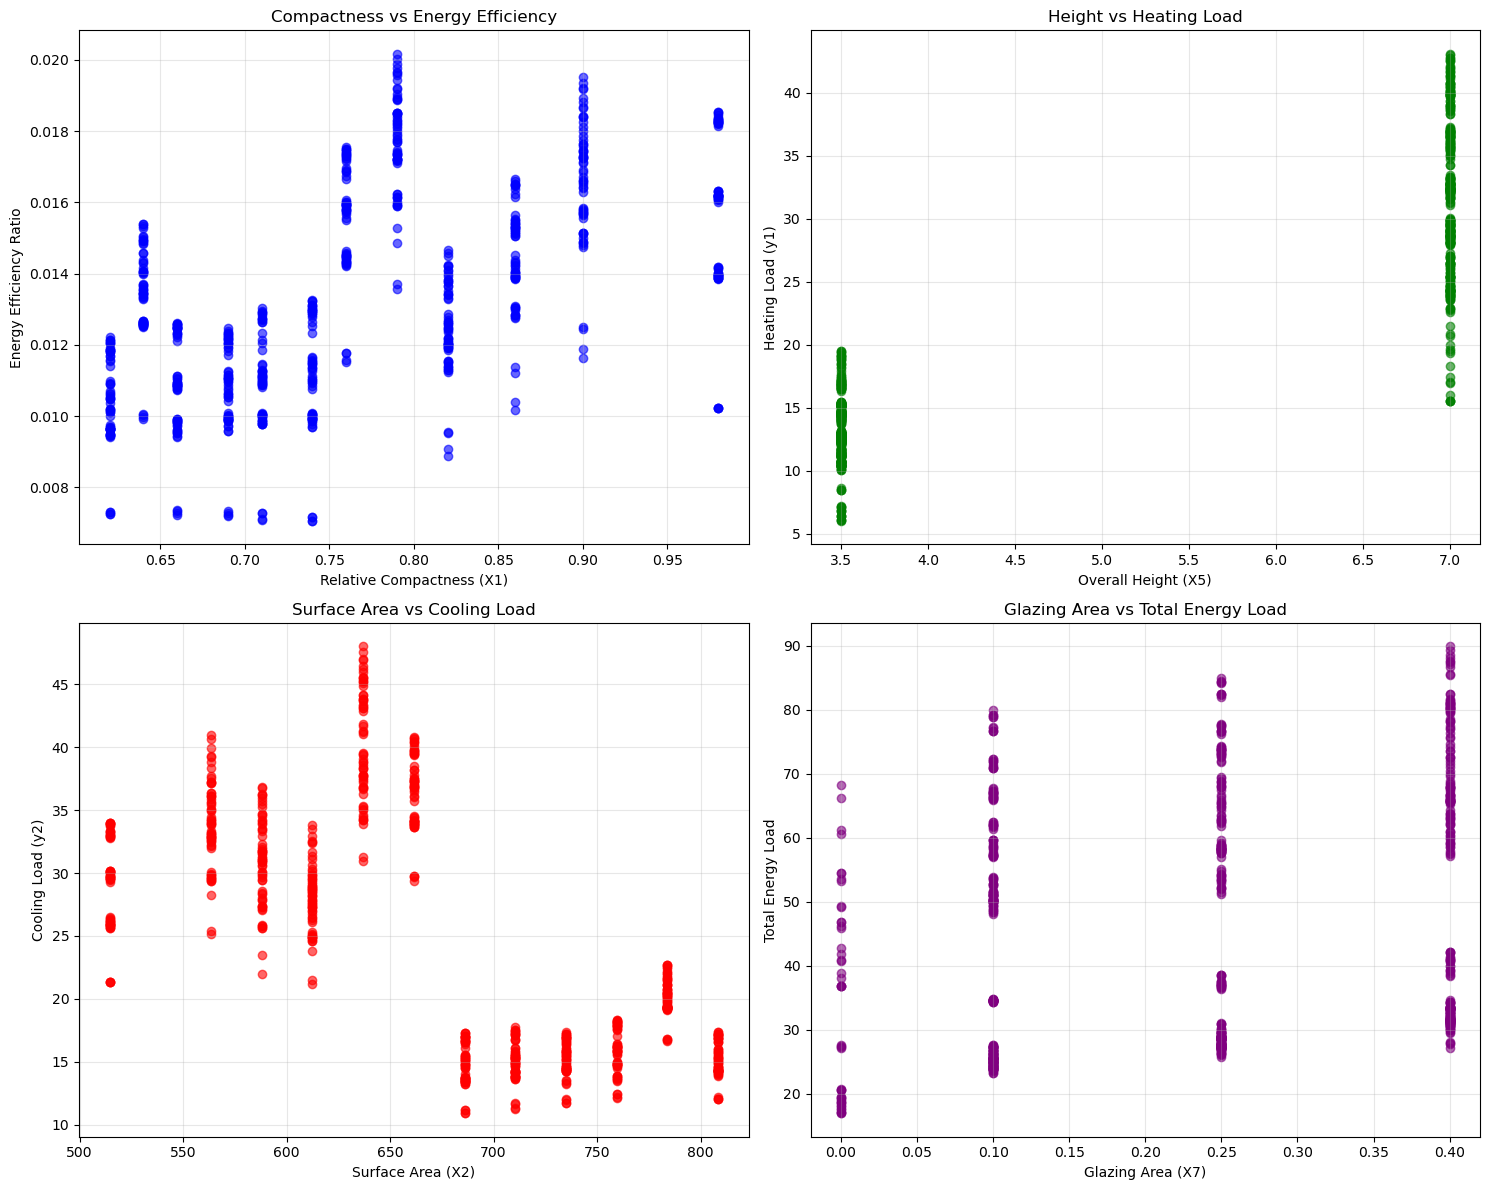

In [6]:
#графики
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# График 1: Относительная компактность vs Энергоэффективность
axes[0,0].scatter(data['X1'], data['energy_efficiency_ratio'], alpha=0.6, c='blue')
axes[0,0].set_xlabel('Relative Compactness (X1)')
axes[0,0].set_ylabel('Energy Efficiency Ratio')
axes[0,0].set_title('Compactness vs Energy Efficiency')
axes[0,0].grid(True, alpha=0.3)

# График 2: Высота здания vs Нагрузка на отопление
axes[0,1].scatter(data['X5'], data['y1'], alpha=0.6, c='green')
axes[0,1].set_xlabel('Overall Height (X5)')
axes[0,1].set_ylabel('Heating Load (y1)')
axes[0,1].set_title('Height vs Heating Load')
axes[0,1].grid(True, alpha=0.3)

# График 3: Площадь поверхности vs Нагрузка на охлаждение
axes[1,0].scatter(data['X2'], data['y2'], alpha=0.6, c='red')
axes[1,0].set_xlabel('Surface Area (X2)')
axes[1,0].set_ylabel('Cooling Load (y2)')
axes[1,0].set_title('Surface Area vs Cooling Load')
axes[1,0].grid(True, alpha=0.3)

# График 4: Площадь остекления vs Общая энергетическая нагрузка
axes[1,1].scatter(data['X7'], data['y1'] + data['y2'], alpha=0.6, c='purple')
axes[1,1].set_xlabel('Glazing Area (X7)')
axes[1,1].set_ylabel('Total Energy Load')
axes[1,1].set_title('Glazing Area vs Total Energy Load')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

На графиках можно выделить 2-4 основные группы зданий по энергоэффективности  
Особенно выражены кластеры на графике Height vs Heating Load

C:\Users\dimpo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\dimpo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\dimpo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\dimpo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

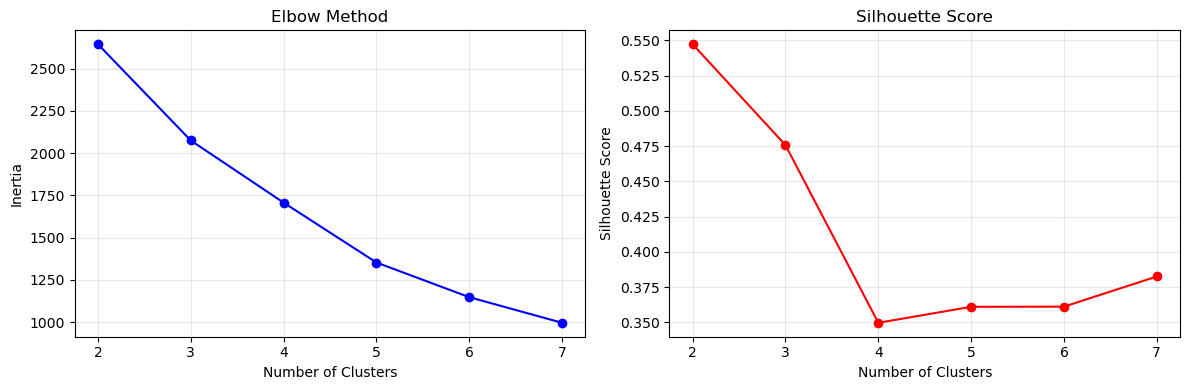

In [7]:
# Метод локтя для определения оптимального числа кластеров
inertia = []
silhouette_scores = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    
    if k > 1:  # silhouette score требует минимум 2 кластера
        score = silhouette_score(scaled_df, kmeans.labels_)
        silhouette_scores.append(score)

# Визуализация метода локтя
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(2, 8), silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Метод локтя указывает на optimal_k = 5, однако замедление не такое уж резкое. А силуэтный анализ указывает на то, что optimal_k = 2.  
Поэтому выберем именно 2.

In [8]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_df)

# Добавляем метки кластеров в данные
data['cluster'] = clusters

C:\Users\dimpo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


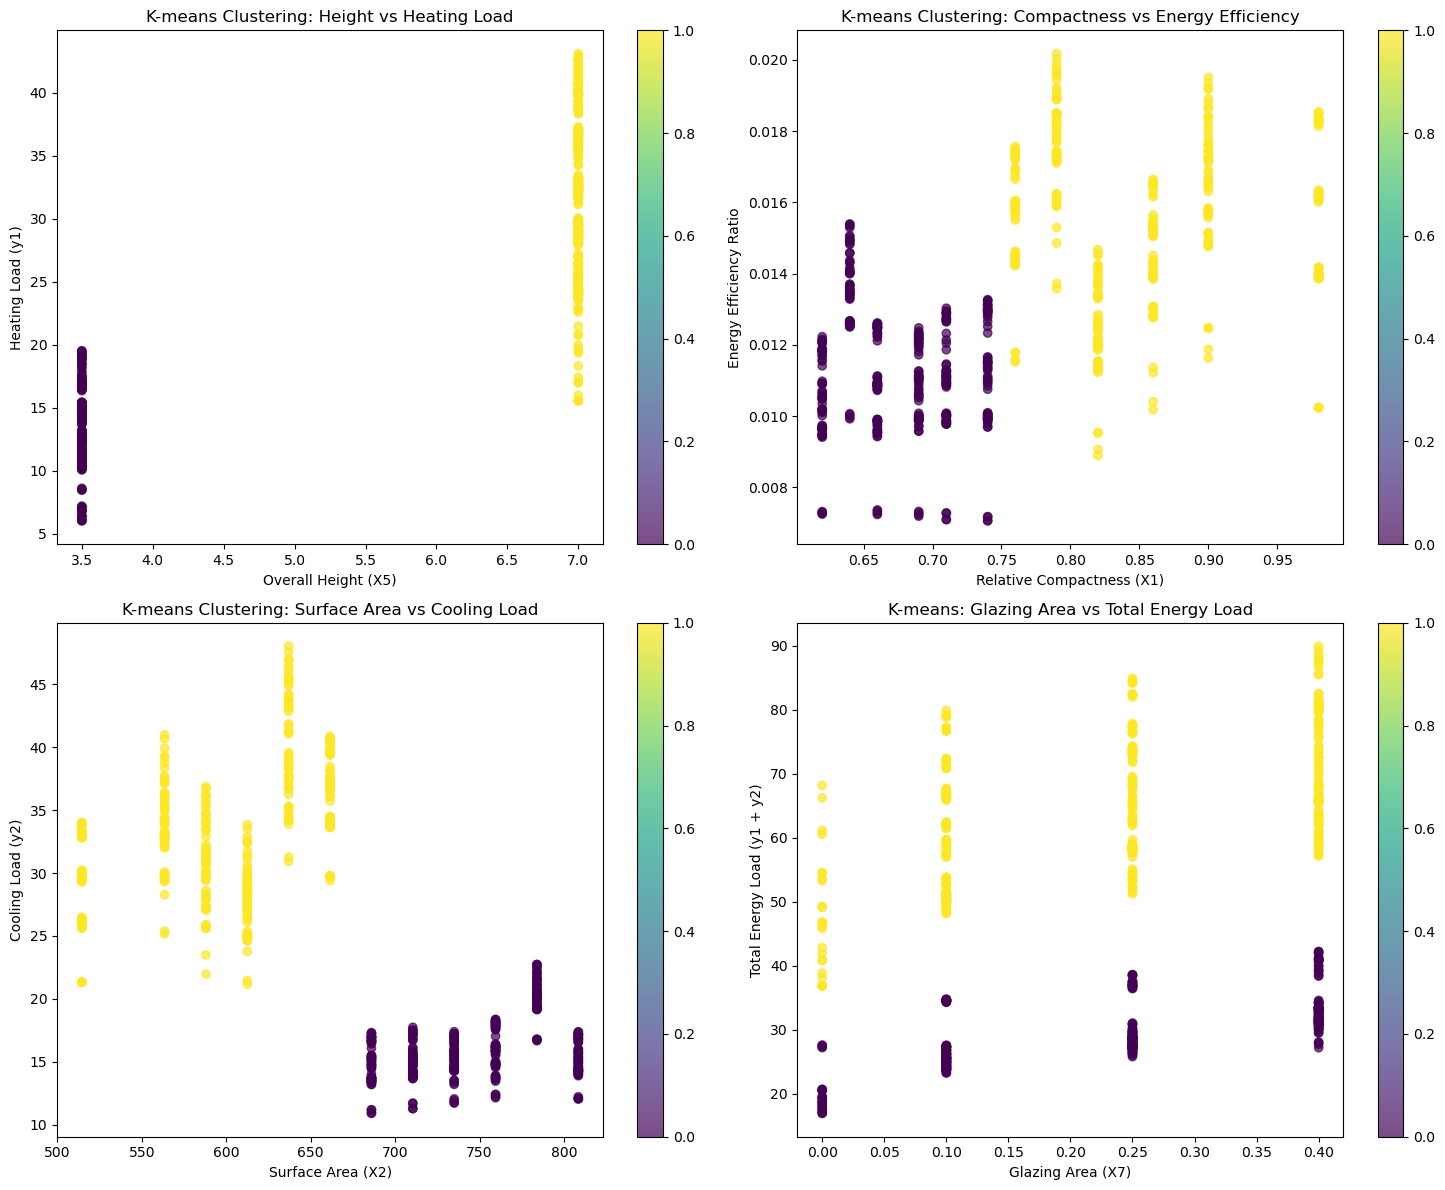

In [9]:
# Визуализация кластеров на лучших признаках
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Кластеры на графике Height vs Heating Load
scatter1 = axes[0,0].scatter(data['X5'], data['y1'], c=data['cluster'], 
                            cmap='viridis', alpha=0.7)
axes[0,0].set_xlabel('Overall Height (X5)')
axes[0,0].set_ylabel('Heating Load (y1)')
axes[0,0].set_title('K-means Clustering: Height vs Heating Load')
plt.colorbar(scatter1, ax=axes[0,0])

# Кластеры на графике Compactness vs Energy Efficiency
scatter2 = axes[0,1].scatter(data['X1'], data['energy_efficiency_ratio'], 
                            c=data['cluster'], cmap='viridis', alpha=0.7)
axes[0,1].set_xlabel('Relative Compactness (X1)')
axes[0,1].set_ylabel('Energy Efficiency Ratio')
axes[0,1].set_title('K-means Clustering: Compactness vs Energy Efficiency')
plt.colorbar(scatter2, ax=axes[0,1])

# Кластеры на графике Surface Area vs Cooling Load
scatter3 = axes[1,0].scatter(data['X2'], data['y2'], c=data['cluster'], 
                            cmap='viridis', alpha=0.7)
axes[1,0].set_xlabel('Surface Area (X2)')
axes[1,0].set_ylabel('Cooling Load (y2)')
axes[1,0].set_title('K-means Clustering: Surface Area vs Cooling Load')
plt.colorbar(scatter3, ax=axes[1,0])

# График 4: Кластеры на графике Glazing Area vs Total Energy Load
scatter4 = axes[1,1].scatter(data['X7'], data['y1'] + data['y2'], 
                            c=data['cluster'], cmap='viridis', alpha=0.7)
axes[1,1].set_xlabel('Glazing Area (X7)')
axes[1,1].set_ylabel('Total Energy Load (y1 + y2)')
axes[1,1].set_title('K-means: Glazing Area vs Total Energy Load')
plt.colorbar(scatter4, ax=axes[1,1])

plt.tight_layout()
plt.show()

In [10]:
print(f"Silhouette Score: {silhouette_score(scaled_df, clusters):.3f}")

Silhouette Score: 0.547


ВЫВОДЫ:  
Оптимальное число кластеров было определено силуэтным анализом  
Вероятнотная интерпретация кластеров:  
Кластер 0: высокая энергоэффективность  
Кластер 1: низкая энергоэффективность